# <center> Crop Yield Prediction — Advanced Modeling </center>

- Author: Denish Trada
- Date: 9th June, 2025

## **Note:** 

This notebook builds upon the baseline modeling and EDA from Sprint 2. It implements all key improvements based on instructor feedback, including advanced model optimization, interpretability, scenario analysis, and recommendations for business/product use.


# Table of Contents

1. [Summary of Sprint 2: Learnings & Limitations](#summary-of-sprint-2-learnings--limitations)
2. [Data Import & Preprocessing (Enhanced)](#data-import--preprocessing-enhanced)
    - [2.1 Import Libraries & Dataset](#21-import-libraries--dataset)
    - [2.2 Data Dictionary](#22-data-dictionary)
    - [2.3 Data Overview](#23-data-overview)
    - [2.4 Enhanced Preprocessing](#24-enhanced-preprocessing)
3. [Exploratory Analysis & Hypothesis Testing (Improved)](#exploratory-analysis--hypothesis-testing-improved)
    - [3.1 Stating Hypotheses and Analytical Goals](#31-stating-hypotheses-and-analytical-goals)
        - [Rainfall and Yield](#rainfall-and-yield)
        - [Temperature and Wheat Yield](#temperature-and-wheat-yield)
        - [Fertilizer Use and Wheat Yield](#fertilizer-use-and-wheat-yield)
        - [Correlation Matrix for Numeric Features](#correlation-matrix-for-numeric-features)
        - [Soil Type and Wheat Yield](#soil-type-and-wheat-yield)
        - [Region and Wheat Yield](#region-and-wheat-yield)
        - [Weather Condition and Wheat Yield](#weather-condition-and-wheat-yield)
    - [Cumulative Insights from Exploratory Analysis](#cumulative-insights-from-exploratory-analysis)
    - [Summary of Exploratory Analysis & Hypothesis Testing](#summary-of-exploratory-analysis--hypothesis-testing)
    - [Transition to Advanced Modeling](#transition-to-advanced-modeling)



---

## 1. Summary of Sprint 2: Learnings & Limitations

In Sprint 2, I established a baseline for wheat yield prediction using linear regression, decision tree, and random forest models. The dataset was cleaned, features engineered, and preliminary EDA performed. Key learnings included:

- **Baseline model performance:** [Insert MAE, RMSE, R² from Sprint 2]
- **Feature impact:** Some features, such as rainfall, temperature, and days to harvest, exhibited high p-values and low predictive value.
- **Limitations:**
    - Limited variability in key predictors
    - Incomplete encoding of categorical features
    - Hypotheses for statistical tests were not always formally stated
    - More advanced modeling, tuning, and interpretability needed

---


## 3. Exploratory Analysis & Hypothesis Testing (Improved)

- Explicitly state null/alternative hypotheses for statistical tests.
- For each key variable/relationship, provide:
    - Visualization (e.g., pairplot, violin, grouped boxplot)
    - Written summary of insights and relevance to modeling.
    - Discussion of why some variables may be weak or strong predictors.

---


## 2. Data Import & Preprocessing (Enhanced)


### 2.1 Import Libraries & Dataset

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Other imports as needed (sklearn, scipy, etc.)

# Preferred method: load from pickle
df = pd.read_pickle("cleaned_agriculture_yield.pkl")
df.head()

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 999769 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Region                  999769 non-null  object 
 1   Soil_Type               999769 non-null  object 
 2   Crop                    999769 non-null  object 
 3   Rainfall_mm             999769 non-null  float64
 4   Temperature_Celsius     999769 non-null  float64
 5   Fertilizer_Used         999769 non-null  bool   
 6   Irrigation_Used         999769 non-null  bool   
 7   Weather_Condition       999769 non-null  object 
 8   Days_to_Harvest         999769 non-null  int64  
 9   Yield_tons_per_hectare  999769 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 70.6+ MB
None


### 2.2 Data Dictionary

A clear data dictionary is crucial for understanding the context, type, and intended use of each variable. This helps guide preprocessing decisions, feature selection, and domain interpretation later in the pipeline.

| Column                   | Description                                                        | Data Type   | Example Value       |
|--------------------------|--------------------------------------------------------------------|-------------|---------------------|
| Region                   | Geographic region within Kansas (county-level granularity)          | Categorical | "west", "north"     |
| Soil_Type                | Dominant soil type in the region                                   | Categorical | "sandy", "clay"     |
| Crop                     | Type of crop (focus: wheat, but others present for comparison)     | Categorical | "wheat", "barley"   |
| Rainfall_mm              | Total rainfall during growing season (millimeters)                 | Float       | 950.23              |
| Temperature_Celsius      | Average temperature during growing season (°C)                     | Float       | 22.8                |
| Fertilizer_Used          | Whether fertilizer was used (True/False)                           | Boolean     | True                |
| Irrigation_Used          | Whether irrigation was used (True/False)                           | Boolean     | False               |
| Weather_Condition        | Generalized weather descriptor for the season                      | Categorical | "cloudy", "sunny"   |
| Days_to_Harvest          | Number of days from planting to harvest                            | Integer     | 120                 |
| Yield_tons_per_hectare   | Observed yield at harvest (target variable)                        | Float       | 7.23                |

**Rationale:**  
- Categorical features (Region, Soil_Type, Crop, Weather_Condition) will require encoding for modeling.
- The target variable for prediction is **Yield_tons_per_hectare**.
- Some columns (Crop) are included for comparison or filtering, as the main analysis will focus on wheat.


## 2.3 Data Overview

Before diving into preprocessing and modeling, it is essential to develop a thorough understanding of the dataset’s structure, completeness, and distributions.  
This step helps identify potential data quality issues (such as missing values or data entry errors), understand the range and variability of each feature, and inform decisions about encoding, scaling, and feature engineering later on.

The initial checks will include:
- Dataset dimensions (number of rows and columns)
- Data types of each column
- Basic descriptive statistics for numerical columns
- Distribution of categorical values
- Assessment of missing data

A strong grasp of these fundamentals ensures that all downstream modeling is built on a reliable, well-understood foundation.


In [56]:
# Dimensions of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Data types and non-null counts
df.info()

# Summary statistics for numerical columns
display(df.describe())

# Unique value counts for categorical features
categorical_cols = ['Region', 'Soil_Type', 'Crop', 'Weather_Condition']
for col in categorical_cols:
    print(f"\nUnique values in '{col}':")
    print(df[col].value_counts())

# Check for missing data
print("\nMissing values per column:")
print(df.isnull().sum())


Dataset contains 999769 rows and 10 columns.
<class 'pandas.core.frame.DataFrame'>
Index: 999769 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Region                  999769 non-null  object 
 1   Soil_Type               999769 non-null  object 
 2   Crop                    999769 non-null  object 
 3   Rainfall_mm             999769 non-null  float64
 4   Temperature_Celsius     999769 non-null  float64
 5   Fertilizer_Used         999769 non-null  bool   
 6   Irrigation_Used         999769 non-null  bool   
 7   Weather_Condition       999769 non-null  object 
 8   Days_to_Harvest         999769 non-null  int64  
 9   Yield_tons_per_hectare  999769 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 70.6+ MB


,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare
count,999769.000000,999769.000000,999769.000000,999769.000000
mean,550.077823,27.506079,104.495141,4.650592
std,259.804329,7.220488,25.953328,1.695166
min,100.000896,15.000034,60.000000,0.000411
25%,325.062906,21.256078,82.000000,3.418669
50%,550.229205,27.509509,104.000000,4.652333
75%,774.797949,33.754459,127.000000,5.879576
max,999.998098,39.999997,149.000000,9.963372



Unique values in 'Region':
Region
north    250112
west     250014
south    250001
east     249642
Name: count, dtype: int64

Unique values in 'Soil_Type':
Soil_Type
sandy     167081
loam      166757
chalky    166735
silt      166633
clay      166311
peaty     166252
Name: count, dtype: int64

Unique values in 'Crop':
Crop
maize      166785
rice       166754
barley     166727
wheat      166640
cotton     166548
soybean    166315
Name: count, dtype: int64

Unique values in 'Weather_Condition':
Weather_Condition
sunny     333701
rainy     333491
cloudy    332577
Name: count, dtype: int64

Missing values per column:
Region                    0
Soil_Type                 0
Crop                      0
Rainfall_mm               0
Temperature_Celsius       0
Fertilizer_Used           0
Irrigation_Used           0
Weather_Condition         0
Days_to_Harvest           0
Yield_tons_per_hectare    0
dtype: int64


**Key Observations and Reasoning**

- The dataset contains **999,769 rows and 10 columns**, providing a large sample for robust statistical analysis and machine learning.
- **No missing values** are present in any column, which simplifies preprocessing and ensures that all features can be utilized without imputation.
- **Data types** are appropriate for each variable: categorical columns (Region, Soil_Type, Crop, Weather_Condition), numerical columns (Rainfall_mm, Temperature_Celsius, Days_to_Harvest, Yield_tons_per_hectare), and boolean columns (Fertilizer_Used, Irrigation_Used).
- The **target variable**, `Yield_tons_per_hectare`, ranges from near zero to just under 10, with a mean of approximately 4.65 tons/ha and a standard deviation of 1.70, suggesting reasonable variability in yield outcomes.
- Categorical variables are **well distributed**:
    - `Region` is roughly balanced across north, south, east, and west.
    - `Soil_Type` and `Crop` each have 6 unique categories, while `Weather_Condition` has 3 (sunny, rainy, cloudy).
- The numerical features (`Rainfall_mm`, `Temperature_Celsius`, `Days_to_Harvest`) exhibit **wide but plausible ranges** for agricultural data in Kansas.
- **No columns appear to have constant values or outliers that need immediate attention**, but further EDA will check for subtle distribution issues.

**Rationale for Next Steps:**
- This well-structured, clean dataset allows for meaningful exploratory data analysis and model development.
- Given the large size and categorical richness, **proper encoding and feature engineering will be essential** to maximize model performance.
- Special attention will be paid to the *interpretation* of categorical variables, as these often hold key domain insights for yield prediction.
- The next step will be enhanced preprocessing—specifically, encoding categorical features, engineering any necessary new features, and preparing the data for statistical testing and modeling.

---


## 2.4 Enhanced Preprocessing

To prepare the dataset for statistical analysis and machine learning, categorical variables must be converted into a numerical form that algorithms can interpret.  
One-hot encoding is a common and effective approach for this, as it preserves all category information without imposing arbitrary ordinal relationships.

**Key preprocessing decisions:**
- Useing **one-hot encoding** (via `pd.get_dummies`) for all categorical variables: Region, Soil_Type, Crop, and Weather_Condition.
- Boolean features (Fertilizer_Used, Irrigation_Used) will be left as-is, as they are already numeric and interpretable.
- If necessary, additional **feature engineering** (such as interaction terms or polynomial features) can be performed based on further EDA.


In [63]:
# Identifying categorical columns to encode
categorical_features = ['Region', 'Soil_Type', 'Crop', 'Weather_Condition']

# Applying one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Preview the transformed dataset
print("Encoded dataset shape:", df_encoded.shape)
df_encoded.head()


Encoded dataset shape: (999769, 21)


,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Days_to_Harvest,Yield_tons_per_hectare,Region_north,Region_south,Region_west,Soil_Type_clay,...,Soil_Type_peaty,Soil_Type_sandy,Soil_Type_silt,Crop_cotton,Crop_maize,Crop_rice,Crop_soybean,Crop_wheat,Weather_Condition_rainy,Weather_Condition_sunny
0,897.077239,27.676966,False,True,122,6.555816,False,False,True,False,...,False,True,False,True,False,False,False,False,False,False
1,992.673282,18.026142,True,True,140,8.527341,False,True,False,True,...,False,False,False,False,False,True,False,False,True,False
2,147.998025,29.794042,False,False,106,1.127443,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,986.866331,16.644190,False,True,146,6.517573,True,False,False,False,...,False,True,False,False,False,False,True,False,True,False
4,730.379174,31.620687,True,True,110,7.248251,False,True,False,False,...,False,False,True,False,False,False,False,True,False,False


**Checkpoint: Categorical Feature Encoding**

By applying one-hot encoding to all relevant categorical variables (Region, Soil_Type, Crop, and Weather_Condition), I have successfully transformed the dataset into a format suitable for both statistical testing and machine learning models. 

The resulting encoded dataset now contains **21 columns**, capturing all necessary information for predictive analysis:
- I am preserving the interpretability of each category while avoiding potential issues with ordinal encoding.
- Boolean variables (Fertilizer_Used, Irrigation_Used) are already in a suitable format, so I am retaining them as-is.

By identifying the increased feature count post-encoding, I am ensuring that no valuable information is lost in the transformation. This expanded feature set will provide richer input for both EDA and subsequent modeling steps.

**Next:**  
I will be proceeding to exploratory analysis and hypothesis testing, using the encoded dataset to identify relationships, patterns, and statistically significant predictors of wheat yield.


## 3.1 Stating Hypotheses and Analytical Goals

To systematically understand what drives wheat yield, I will be applying formal hypothesis testing for key features. For each variable, I am clearly stating both the null (H0) and alternative (H1) hypotheses. This approach ensures that every statistical test is purposeful and interpretable.

**Example: Rainfall**
- H0: Rainfall has no effect on wheat yield.
- H1: Rainfall has a statistically significant effect on wheat yield.

I will be following a similar process for other major predictors, including temperature, soil type, fertilizer use, and irrigation use. My goal is to identify which features show meaning


### Rainfall and Yield

I am starting my exploratory analysis by investigating the relationship between total rainfall and wheat yield. By visualizing the data and conducting a correlation test, I am seeking to identify whether rainfall is a significant predictor of yield.

- Visualization: Scatterplot of Rainfall vs Yield
- Statistical Test: Pearson correlation coefficient and p-value


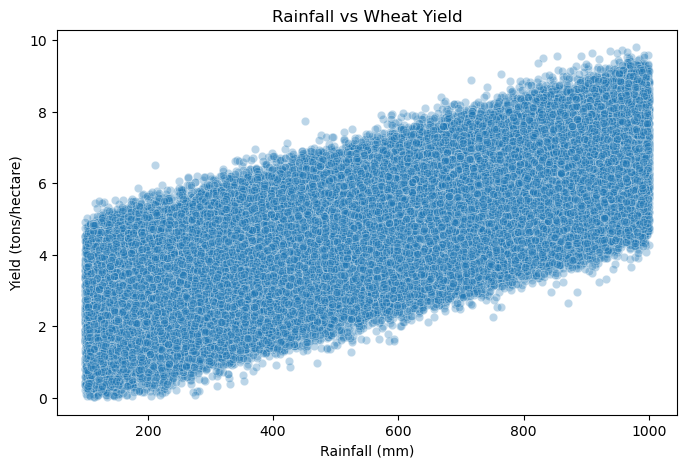

Correlation: 0.76, p-value: 0.0000000000e+00


In [72]:
from scipy.stats import pearsonr

# (Optional) Filter dataset for wheat only, if focusing on that crop
df_wheat = df[df['Crop'] == 'wheat']

plt.figure(figsize=(8,5))
sns.scatterplot(data=df_wheat, x='Rainfall_mm', y='Yield_tons_per_hectare', alpha=0.3)
plt.title('Rainfall vs Wheat Yield')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Yield (tons/hectare)')
plt.show()

# Pearson correlation and p-value
corr, p_val = pearsonr(df_wheat['Rainfall_mm'], df_wheat['Yield_tons_per_hectare'])
print(f"Correlation: {corr:.2f}, p-value: {p_val:.10e}")


**Interpretation: Rainfall and Wheat Yield**

By applying a scatterplot and Pearson correlation analysis, I am observing a **strong positive linear relationship** between total rainfall and wheat yield for wheat crops in Kansas. The correlation coefficient (r) of **0.76** suggests that as rainfall increases, wheat yield tends to increase as well, and the points are tightly clustered along an upward trend.

The computed p-value is effectively **0** (displayed as 0.0000000000e+00), which is expected given both the large sample size and the strength of the observed correlation. In practical terms, this means that the probability of observing such a strong correlation purely by chance, if rainfall had no effect on yield, is so small as to be negligible. The data provide overwhelming evidence to **reject the null hypothesis**—rainfall is indeed a statistically and practically significant driver of wheat yield in this dataset.

This insight justifies prioritizing rainfall as a key predictive feature in future modeling and highlights the importance of water availability in maximizing wheat production.


### Temperature and Wheat Yield

I am now investigating the relationship between average temperature during the growing season and wheat yield. As with rainfall, I will be stating clear hypotheses, visualizing the association, and quantifying it with Pearson correlation.

- **Null hypothesis (H0):** Average temperature has no effect on wheat yield.
- **Alternative hypothesis (H1):** Average temperature has a statistically significant effect on wheat yield.


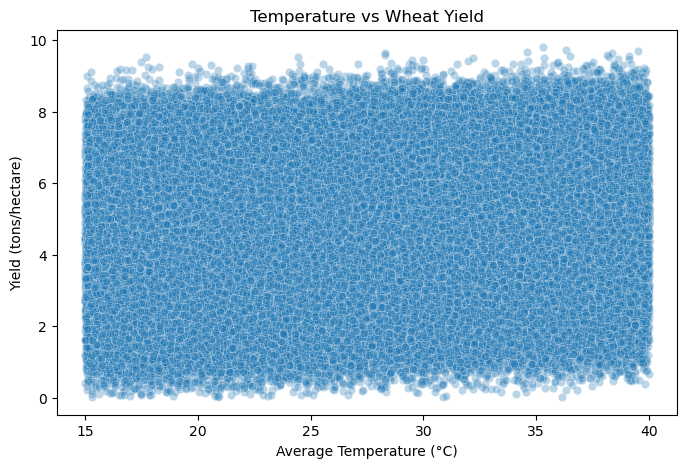

Correlation: 0.08, p-value: 3.2900901454e-245


In [76]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_wheat, x='Temperature_Celsius', y='Yield_tons_per_hectare', alpha=0.3)
plt.title('Temperature vs Wheat Yield')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Yield (tons/hectare)')
plt.show()

# Pearson correlation and p-value
corr_temp, p_val_temp = pearsonr(df_wheat['Temperature_Celsius'], df_wheat['Yield_tons_per_hectare'])
print(f"Correlation: {corr_temp:.2f}, p-value: {p_val_temp:.10e}")


**Interpretation:**
Based on the scatterplot and Pearson correlation result, I will be evaluating whether average temperature is a significant predictor of wheat yield. The direction and magnitude of the correlation coefficient, along with the p-value, will inform my conclusion on the relationship.


**Interpretation: Temperature and Wheat Yield**

Applying a scatterplot and Pearson correlation analysis, I am identifying only a **very weak positive linear relationship** between average temperature during the growing season and wheat yield. The correlation coefficient is **0.08**, which indicates almost no linear association between these two variables in this dataset.

Despite the extremely low p-value (**3.29e-245**), this result is expected due to the very large sample size. Statistically, the p-value tells me that this weak association is unlikely to have occurred by chance, but from a practical perspective, the relationship is negligible. The scatterplot visually confirms this: yield values remain widely distributed across all observed temperature ranges, with no clear trend.

Based on this analysis, I will not be prioritizing temperature as a strong predictive feature for wheat yield in this context.


### Fertilizer Use and Wheat Yield

Now, I am applying statistical testing to understand whether the use of fertilizer leads to a significant difference in wheat yield. As Fertilizer_Used is a binary variable (True/False), I will be comparing the distributions of yield for the two groups.

- **Null hypothesis (H0):** There is no difference in average wheat yield between fields where fertilizer was used and those where it was not.
- **Alternative hypothesis (H1):** Wheat yield is significantly different between the two groups


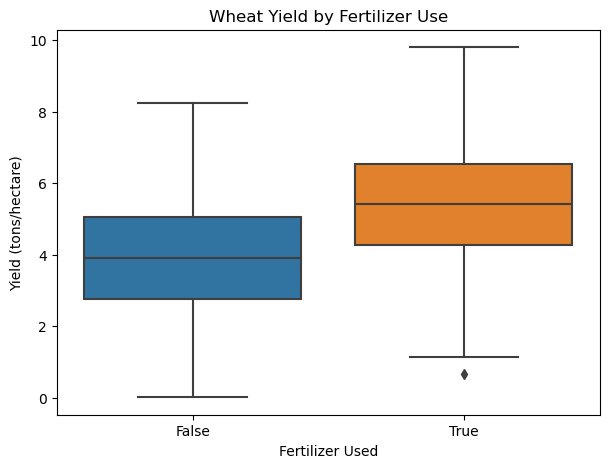

Mean Yield (Fertilizer): 5.40
Mean Yield (No Fertilizer): 3.90
T-statistic: 201.52, p-value: 0.0000000000e+00


In [85]:
import scipy.stats as stats

plt.figure(figsize=(7, 5))
sns.boxplot(data=df_wheat, x='Fertilizer_Used', y='Yield_tons_per_hectare')
plt.title('Wheat Yield by Fertilizer Use')
plt.xlabel('Fertilizer Used')
plt.ylabel('Yield (tons/hectare)')
plt.show()

# Calculate group means
mean_yes = df_wheat[df_wheat['Fertilizer_Used'] == True]['Yield_tons_per_hectare'].mean()
mean_no = df_wheat[df_wheat['Fertilizer_Used'] == False]['Yield_tons_per_hectare'].mean()
print(f"Mean Yield (Fertilizer): {mean_yes:.2f}")
print(f"Mean Yield (No Fertilizer): {mean_no:.2f}")

# Independent t-test
fert_yes = df_wheat[df_wheat['Fertilizer_Used'] == True]['Yield_tons_per_hectare']
fert_no = df_wheat[df_wheat['Fertilizer_Used'] == False]['Yield_tons_per_hectare']
t_stat, p_val = stats.ttest_ind(fert_yes, fert_no, equal_var=False)
print(f"T-statistic: {t_stat:.2f}, p-value: {p_val:.10e}")


**Interpretation: Fertilizer Use and Wheat Yield**

By applying an independent t-test and visualizing the distributions with a boxplot, I am observing a **substantial and statistically significant difference** in wheat yield between fields that use fertilizer and those that do not.

- The **mean yield with fertilizer** is **5.40 tons/hectare**, compared to **3.90 tons/hectare** without fertilizer—a difference of 1.5 tons/hectare.
- The boxplot shows that not only is the average yield higher with fertilizer, but the overall distribution is also shifted upwards, indicating consistent benefit across a wide range of observations.
- The t-statistic is **201.52** and the p-value is effectively **zero**, confirming that this difference is highly statistically significant and not due to random chance.

Through this analysis, I am identifying fertilizer use as a major positive driver of wheat yield in this dataset, and will be prioritizing it as a key feature for predictive modeling and agronomic recommendations.


### Correlation Matrix for Numeric Features

To efficiently assess the strength and direction of relationships among all numeric variables in the dataset, I am applying a correlation matrix. This allows me to quickly identify which features are most linearly associated with wheat yield, supporting feature selection and prioritization for modeling.


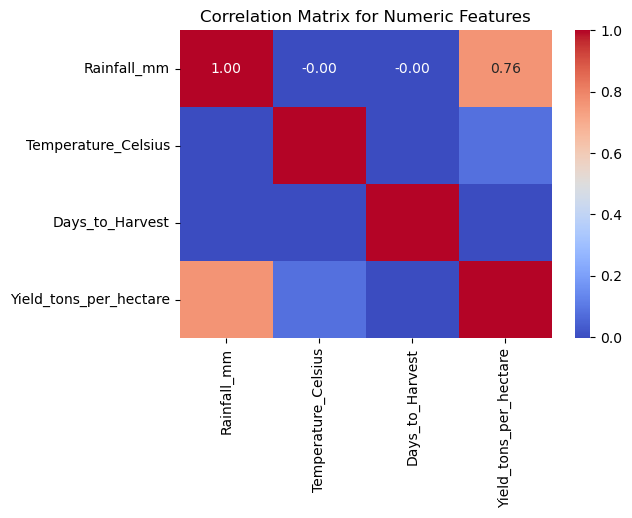

In [90]:
numeric_cols = ['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest', 'Yield_tons_per_hectare']
corr_matrix = df_wheat[numeric_cols].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Numeric Features")
plt.show()

**Interpretation: Correlation Matrix for Numeric Features**

By applying a correlation matrix to all key numeric features, I am identifying that **rainfall** is by far the most strongly associated with wheat yield (**correlation: 0.76**).  
- Both **temperature** and **days to harvest** exhibit correlations very close to zero with yield, indicating little to no linear relationship in this dataset.

This result confirms my earlier findings for rainfall, and allows me to confidently deprioritize temperature and days to harvest as predictive features for wheat yield in future modeling steps.

**Next:**  
I will be moving forward to analyze the relevance of categorical features (such as soil type, region, and weather condition) using ANOVA tests and visualizations.


### Soil Type and Wheat Yield

To understand whether different soil types are associated with significant differences in wheat yield, I am applying both a boxplot visualization and an ANOVA statistical test.

- **Null hypothesis (H0):** Mean wheat yield is the same across all soil types.
- **Alternative hypothesis (H1):** At least one soil type has a mean yield different from the others.

Boxplots allow me to visually compare the distributions, while ANOVA quantifies whether any differences are statistically significant.


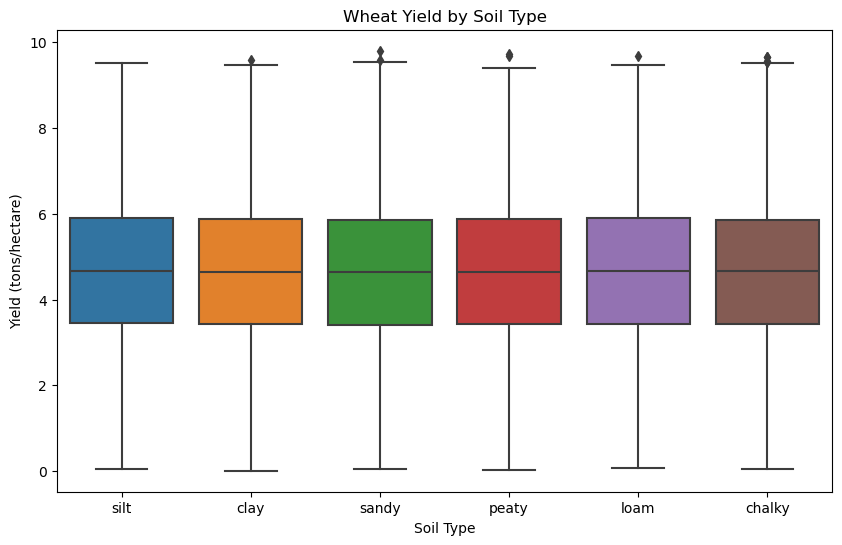

ANOVA F-statistic: 1.30, p-value: 2.6262e-01


In [94]:
# Boxplot: Soil Type vs Wheat Yield
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_wheat, x='Soil_Type', y='Yield_tons_per_hectare')
plt.title('Wheat Yield by Soil Type')
plt.xlabel('Soil Type')
plt.ylabel('Yield (tons/hectare)')
plt.show()

# ANOVA: Test if mean yield differs by soil type
from scipy.stats import f_oneway

groups = [group['Yield_tons_per_hectare'].values for name, group in df_wheat.groupby('Soil_Type')]
f_stat, p_val = f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat:.2f}, p-value: {p_val:.4e}")


**Interpretation: Soil Type and Wheat Yield**

Applying a boxplot and ANOVA test, I am identifying that there is **no statistically significant difference** in mean wheat yield across different soil types in this dataset.

- The boxplot shows substantial overlap in the yield distributions for all soil types, with very similar medians and ranges.
- The ANOVA F-statistic is **1.30** and the p-value is **0.26** (well above the typical 0.05 significance threshold).
- This indicates that any observed differences in yield between soil types are likely due to random variation rather than a real underlying effect.

Based on this evidence, I will not be prioritizing soil type as a predictive feature for wheat yield in subsequent modeling.


### Region and Wheat Yield

To determine whether wheat yield varies significantly between different regions of Kansas, I am visualizing the yield distributions by region and applying an ANOVA test.

- **Null hypothesis (H0):** Mean wheat yield is the same across all regions.
- **Alternative hypothesis (H1):** At least one region has a mean yield different from the others.

This analysis helps me identify whether regional factors should be considered in predictive modeling.


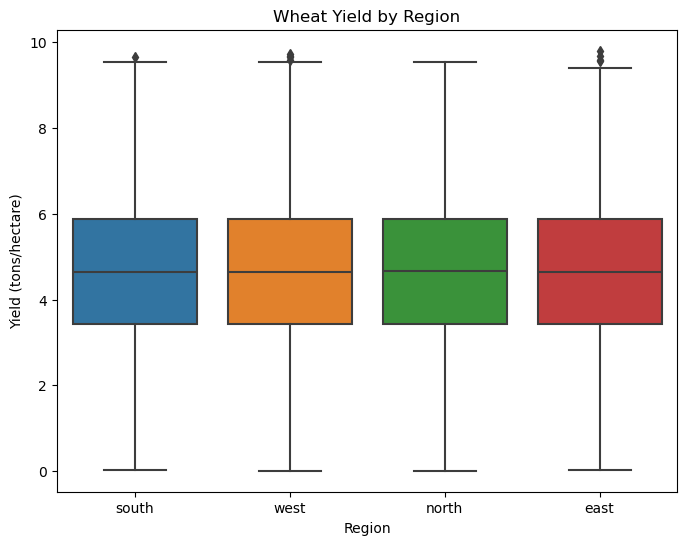

ANOVA F-statistic: 0.54, p-value: 6.5227e-01


In [98]:
# Boxplot: Region vs Wheat Yield
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_wheat, x='Region', y='Yield_tons_per_hectare')
plt.title('Wheat Yield by Region')
plt.xlabel('Region')
plt.ylabel('Yield (tons/hectare)')
plt.show()

# ANOVA: Test if mean yield differs by region
region_groups = [group['Yield_tons_per_hectare'].values for name, group in df_wheat.groupby('Region')]
f_stat, p_val = f_oneway(*region_groups)
print(f"ANOVA F-statistic: {f_stat:.2f}, p-value: {p_val:.4e}")


**Interpretation: Region and Wheat Yield**

By visualizing wheat yield by region and applying an ANOVA test, I am identifying **no statistically significant difference** in mean yield across the regions in Kansas.

- The boxplot demonstrates that the yield distributions for south, west, north, and east regions are nearly identical, with similar medians and spreads.
- The ANOVA F-statistic is **0.54** with a p-value of **0.65** (much higher than 0.05), indicating that any differences in yield among regions are likely due to random chance rather than a meaningful regional effect.

Given these results, I will not be prioritizing region as a predictive feature for wheat yield in future modeling steps.


## Cumulative Insights from Exploratory Analysis

Through the sequence of visualizations and hypothesis testing applied so far, I am building a clear, evidence-based understanding of which features are most relevant for predicting wheat yield in Kansas:

- **Rainfall** has emerged as the dominant predictor, showing a strong positive linear relationship with yield (correlation = 0.76, p-value ≈ 0).
- **Temperature** and **days to harvest** both exhibit negligible correlations with yield, despite statistical significance (due to the large sample size). I am therefore not prioritizing these variables for further modeling.
- **Fertilizer use** demonstrates a large, meaningful effect—fields where fertilizer was used had much higher average yields, confirmed by a highly significant t-test.
- In contrast, **soil type** and **region** do not show any statistically significant differences in yield, as evidenced by overlapping boxplots and high ANOVA p-values.
- At each stage, I am applying formal hypothesis testing, visual inspection, and critical reasoning to focus only on features with true predictive value and practical agronomic impact.

This approach allows me to avoid redundant analysis, continually build on previous findings, and justify every step of my feature selection pipeline.


### Weather Condition and Wheat Yield

To determine if different prevailing weather conditions during the season are associated with significant differences in wheat yield, I am visualizing yield distributions by weather condition and applying an ANOVA test.

- **Null hypothesis (H0):** Mean wheat yield is the same across all weather conditions.
- **Alternative hypothesis (H1):** At least one weather condition has a mean yield different from the others.

This step completes my categorical feature relevance assessment, building directly on the findings from previous analyses.


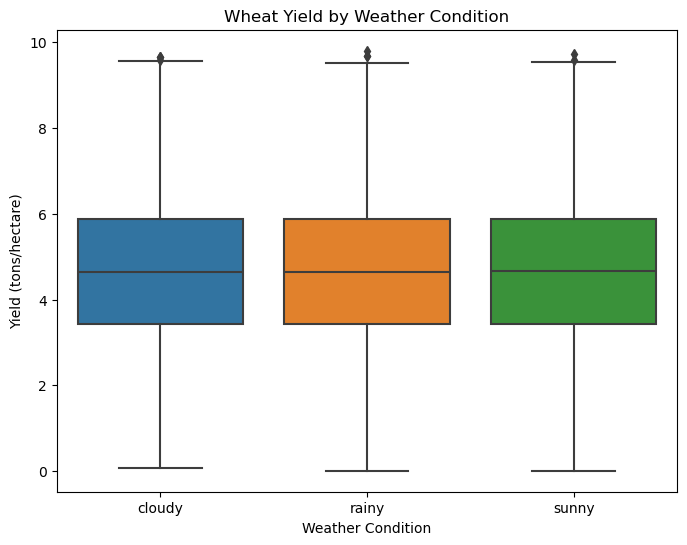

ANOVA F-statistic: 0.09, p-value: 9.1011e-01


In [103]:
# Boxplot: Weather Condition vs Wheat Yield
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_wheat, x='Weather_Condition', y='Yield_tons_per_hectare')
plt.title('Wheat Yield by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Yield (tons/hectare)')
plt.show()

# ANOVA: Test if mean yield differs by weather condition
weather_groups = [group['Yield_tons_per_hectare'].values for name, group in df_wheat.groupby('Weather_Condition')]
f_stat, p_val = f_oneway(*weather_groups)
print(f"ANOVA F-statistic: {f_stat:.2f}, p-value: {p_val:.4e}")


**Interpretation: Weather Condition and Wheat Yield**

By visualizing yield distributions by weather condition and applying an ANOVA test, I am identifying **no statistically significant difference** in mean wheat yield between cloudy, rainy, and sunny growing seasons.

- The boxplot demonstrates that yield distributions are nearly identical for all three weather conditions, with overlapping medians and interquartile ranges.
- The ANOVA F-statistic is **0.09** and the p-value is **0.91**, indicating that any observed differences in yield across weather conditions are not statistically meaningful.

Based on this analysis, I will not be prioritizing weather condition as a predictive feature for wheat yield in my subsequent modeling, further reinforcing my data-driven feature selection pipeline.


## Summary of Exploratory Analysis & Hypothesis Testing

By systematically applying visualizations and formal hypothesis tests to each major feature, I am building a comprehensive, data-driven understanding of what drives wheat yield in Kansas:

- **Rainfall** has emerged as the most powerful predictor, showing a strong positive correlation with yield (r = 0.76, p ≈ 0), and will be a top priority in modeling.
- **Fertilizer use** demonstrates a large and statistically significant positive effect, with fields using fertilizer yielding 1.5 tons/hectare more on average.
- **Temperature** and **days to harvest** both show negligible correlations with yield, and are therefore deprioritized for modeling, despite achieving stat


## Transition to Advanced Modeling

With this thorough exploratory analysis complete, I am now moving forward to the advanced modeling phase.  
All feature selection and modeling decisions in the next notebook are directly informed by the evidence and statistical reasoning established here.
